# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

*Everardo Molina*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


# Hack Day 

https://github.com/kblei001/Physics-Hack-Day

## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

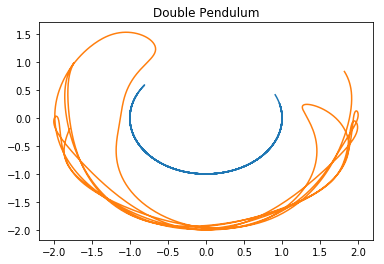

In [167]:

%matplotlib inline
import numpy as np
from numpy import sin,cos
import matplotlib.pyplot as plt
from numpy import pi as pi
from matplotlib import animation


g = 9.8
dt = 0.01
L1= 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0

omega1_int = 0.0
omega2_int = 0.0

theta1_int = (2.0)
theta2_int = (2.0)

t_final = 10.0











def omega_1dot(theta_1,theta_2,omega_1,omega_2,t):
    
     return -((omega_1**2)*sin(2*theta_1-2*theta_2)+(2*omega_2**2)*sin(theta_1-theta_2)+(g/L1)*(sin(theta_1-theta_2)+3*sin(theta_1)))/(3-cos(2*theta_1-2*theta_2))
    
def theta_1dot(theta_1,theta_2,omega_1,omega_2,t):
    
    return omega_1

def omega_2dot (theta_1,theta_2,omega_1,omega_2,t):
    
    return ((4*omega_1**2)*sin(theta_1-theta_2)+(omega_2**2)*sin(2*theta_1-2*theta_2)+(2*(g/L2))*(sin(2*theta_1-theta_2)-sin(theta_2)))/(3-cos(2*theta_1-2*theta_2))
    
def theta_2dot(theta_1,theta_2,omega_1,omega_2,t):
    
    return omega_2





tpoints = np.arange(0, t_final, dt)

def time_and_angles_leapfrog():
    
    theta_points1 = []
    theta_points2 = []
    
    omega_points1 = []
    omega_points2 = []
    
    theta_1 = theta1_int
    theta_2 = theta2_int
    
    omega_1 = omega2_int
    omega_2 = omega2_int
    
    theta1_half = theta1_int + 0.5*dt*theta_1dot(theta1_int,theta2_int,omega1_int,omega2_int,0)
    
    theta2_half = theta2_int + 0.5*dt*theta_2dot(theta1_int,theta2_int,omega1_int,omega2_int,0)
    
    omega1_half = omega1_int + 0.5*dt*omega_1dot(theta1_int,theta2_int,omega1_int,omega2_int,0)

    omega2_half = omega2_int + 0.5*dt*omega_2dot(theta1_int,theta2_int,omega1_int,omega2_int,0)

    
    for t in tpoints:
        
        theta_points1.append(theta_1)
        theta_points2.append(theta_2)
        
        omega_points1.append(omega_1)
        omega_points2.append(omega_2)
       
       
        theta_1 += dt*theta_1dot(theta1_half,theta2_half,omega1_half,omega2_half, t+0.5*dt)
        
        theta_2 += dt*theta_2dot(theta1_half,theta2_half,omega1_half,omega2_half, t+0.5*dt)
        
        
        omega_1 += dt*omega_1dot(theta1_half,theta2_half,omega1_half,omega2_half, t+0.5*dt)
        
        omega_2 += dt*omega_2dot(theta1_half,theta2_half,omega1_half,omega2_half, t+0.5*dt)
        
        
        
        theta1_half += dt*theta_1dot(theta_1,theta_2,omega_1,omega_2, t)
        
        theta2_half += dt*theta_2dot(theta_1,theta_2,omega_1,omega_2, t)
        
        
        omega1_half += dt*omega_1dot(theta_1,theta_2,omega_1,omega_2, t)
        
        omega2_half += dt*omega_2dot(theta_1,theta_2,omega_1,omega_2, t)
        
        
    tt = np.array(tpoints)
    thetas_1 = np.array(theta_points1)
    thetas_2 = np.array(theta_points2)
    omegas_1 = np.array(omega_points1)
    omegas_2 = np.array(omega_points2)
    
    return tt, thetas_1,thetas_2,omegas_1,omegas_2

times, thetas_1lf,thetas_2lf, omegas_1lf,omegas_2lf = time_and_angles_leapfrog()

x_1 = L1*sin(thetas_1lf)

y_1 = -L1*cos(thetas_1lf)

x_2 = L1*sin(thetas_1lf)+L2*sin(thetas_2lf)

y_2 = -L1*cos(thetas_1lf)-L2*cos(thetas_2lf)

#%matplotlib inline

#plt.plot(times,thetas_1lf)
#plt.plot(times,thetas_2lf)
#plt.plot( times, omegas_2lf)
plt.plot(x_1,y_1)
plt.plot(x_2,y_2)
plt.title("Double Pendulum")
#plt.xlabel('time')
#plt.ylabel('Measurements [mks]')
#plt.legend()
plt.show()

In [168]:
"""%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    
    
    return line,

# animation function.  This is called sequentially
def animate(i):
    
    omega_1dot
    
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.show()"""

'%matplotlib notebook\n\nfig = plt.figure()\nax = plt.axes(xlim=(0, 2), ylim=(-2, 2))\nline, = ax.plot([], [], lw=2)\n\ndef init():\n    line.set_data([], [])\n    \n    \n    return line,\n\n# animation function.  This is called sequentially\ndef animate(i):\n    \n    omega_1dot\n    \n    x = np.linspace(0, 2, 1000)\n    y = np.sin(2 * np.pi * (x - 0.01 * i))\n    line.set_data(x, y)\n    return line\n\nanim = animation.FuncAnimation(fig, animate, init_func=init,\n                               frames=100, interval=20, blit=True)\n\nplt.show()'

<IPython.core.display.Javascript object>


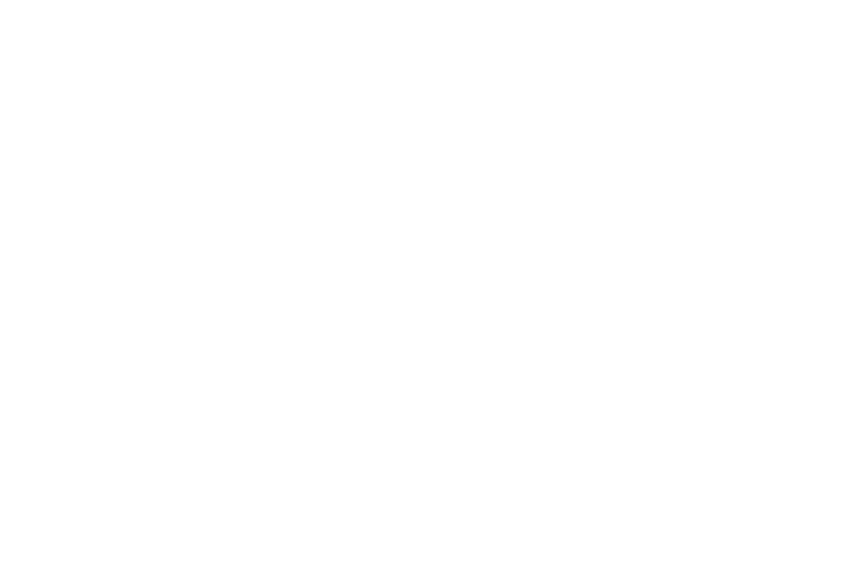

<IPython.core.display.Javascript object>


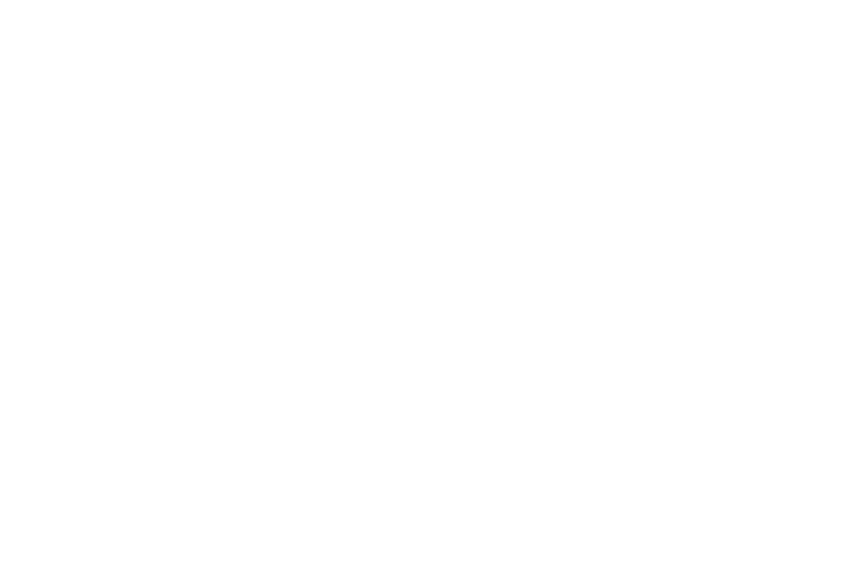

In [169]:


%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()


line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x[i], x_2[i]]
    thisy = [0, y[i], y_2[i]]
    
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(len(thetas_1lf)),
                              interval=25, blit=True, init_func=init)

#HTML(ani.to_html5_video())


plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

In [181]:
import numpy as np

# Constants
M = 9        # grid squares per side
V = 1.0        # Voltage at the top
target = 1e-2  # target accuracy

# arrays

#H = [0.0,0.0,0.0,0.0,0.0]

#N = [0.0,0.0,0.0,V,0.0]

#T = [0.0,-V,0.0,0.0,0.0]




phi = np.zeros([M+1,M+1],float) # initialize

phi[2,6] = 1 
phi[3,6] = 1 
phi[2,7] = 1 
phi[3,7] = 1 


phi[6,2] = -1 
phi[6,3] = -1 
phi[7,2] = -1 
phi[7,3] = -1 

phiprime = np.zeros([M+1, M+1],float) # container for new values

print(phi)

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi

            
# print(phi)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


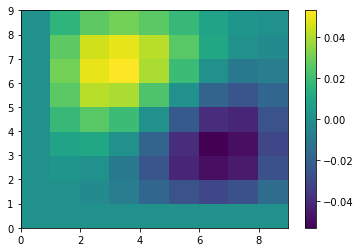

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()